<a href="https://colab.research.google.com/github/Michlassul/Netflix_Recommended_System/blob/main/Muhammad_Ichlassul_Progress_Script_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Netflix Recommendation System




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statistics
import re
import string
import plotly.subplots as sp
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

##Import Data

In [ ]:
df = pd.read_csv('/content/titles.csv')

In [ ]:
credits_df = pd.read_csv('/content/credits.csv')

In [ ]:
df.shape

(5850, 15)

In [ ]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


##Data Cleaning

In [ ]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Dropping unnamed title

In [ ]:
df.dropna(subset=['title'], inplace=True)

Checking for duplicate

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

id                         0
title                      0
type                       0
description               17
release_year               0
age_certification       2618
runtime                    0
genres                     0
production_countries       0
seasons                 3743
imdb_id                  403
imdb_score               481
imdb_votes               497
tmdb_popularity           90
tmdb_score               310
dtype: int64

In [ ]:
df["type"].value_counts()

MOVIE    3743
SHOW     2106
Name: type, dtype: int64

Turning all null in seasons into 0, because all of the missing value is from Movies

In [ ]:
df['seasons'].fillna(0, inplace=True)

In [ ]:
df.isna().sum()

id                         0
title                      0
type                       0
description               17
release_year               0
age_certification       2618
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  403
imdb_score               481
imdb_votes               497
tmdb_popularity           90
tmdb_score               310
dtype: int64

Filling the missing age certif with not rated

In [ ]:
print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

['TV-MA' 'R' 'PG' nan 'TV-14' 'PG-13' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7' 'G'
 'NC-17']


Filling the NaN values from this columns using their own average values.

In [ ]:
four_col = df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]]
df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]] = four_col.apply(lambda x : x.fillna(np.mean(x)))

Dropping imdb_id

In [ ]:
df = df.drop('imdb_id', axis=1)

In [ ]:
df.dropna(subset=['description'], inplace=True)

In [ ]:
data = df

In [ ]:
df.shape

(5832, 14)

In [ ]:
df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

##EDA

###**1. What is the distribution of type?**

In [ ]:
type_count = df["type"].value_counts()

type_fig = px.pie(values=type_count.values,names=type_count.index,template="plotly_dark",title="Type distribution")
type_fig.update_traces(textinfo='label+percent+value')
type_fig.update_layout(font = dict(size= 13, family="Franklin Gothic"))
type_fig.show()

In this dataset, 36% data is Show and 64% data is Movie

###**2. What are the top 10 most frequent age certification?**

In [ ]:
age_count = df["age_certification"].value_counts()[:10]
age_fig = px.bar(y=age_count.values,x=age_count.index,text=age_count.values,title="Top 10 Age certification count",color=age_count.index,template="plotly_dark")
age_fig.update_layout(xaxis_title="Age certification",yaxis_title="Count")
age_fig.update_layout(font = dict(size= 13, family="Franklin Gothic"))
age_fig.show()

The most frequent age certification is Not Rated, which has 2618 results, the second one is TV-MA, which is the TV Parental Guidelines signifies content for mature audiences, has 883 results.

###**3. What are the top 10 most frequent genre?**

In [ ]:
genreslist = list()
df.genres.str.findall(r"'(\w+?)'").map(lambda x: genreslist.extend(x))
top_10_genres = pd.Series(genreslist).value_counts()[:10]

In [ ]:
genres_fig = px.bar(y=top_10_genres.values,x=top_10_genres.index,text=top_10_genres,title="Top 10 Genres",color=top_10_genres.index,template="plotly_dark")
genres_fig.update_layout(xaxis_title="Genre",yaxis_title="Count")
genres_fig.update_layout(font = dict(size= 13, family="Franklin Gothic"))
genres_fig.show()

###**4. What are the Top 10 Production Countries?**

In [ ]:
country_list = list()
df.production_countries.str.findall(r"'(\w+?)'").map(lambda x: country_list.extend(x))

country_list = pd.Series(country_list).replace("Lebanon","LB")
country_list = country_list.value_counts()[:10]

In [ ]:
country_fig = px.bar(y=country_list.values,x=country_list.index,text=country_list.values,title="Top 10 Production Countries",color=country_list.index,template="plotly_dark")
country_fig.update_layout(xaxis_title="Countries",yaxis_title="Count")
country_fig.update_layout(font = dict(size= 13, family="Franklin Gothic"))
country_fig.show()

###**5. When is Most of the Films on Netflix release?**

In [ ]:
release_count= df.release_year.value_counts()
release_count= pd.DataFrame(release_count)
release_count

,release_year
2019,833
2020,808
2021,787
2018,768
2017,563
2022,370
2016,362
2015,222
2014,152
2013,134


In [ ]:
year_df = df.groupby("type")["release_year"].apply(list)
Year_label = ["Type: Movie","Type: Show"]
color = ["yellow","red"]

year_fig = ff.create_distplot(year_df,Year_label,colors=color,show_hist=False)
year_fig.layout.template = "plotly_dark"
year_fig.update_layout(title="Film Distribution",font=dict(size = 15,family="Franklin Gothic"))
year_fig.update_layout(xaxis_title="Year",yaxis_title="Density")
year_fig.show()


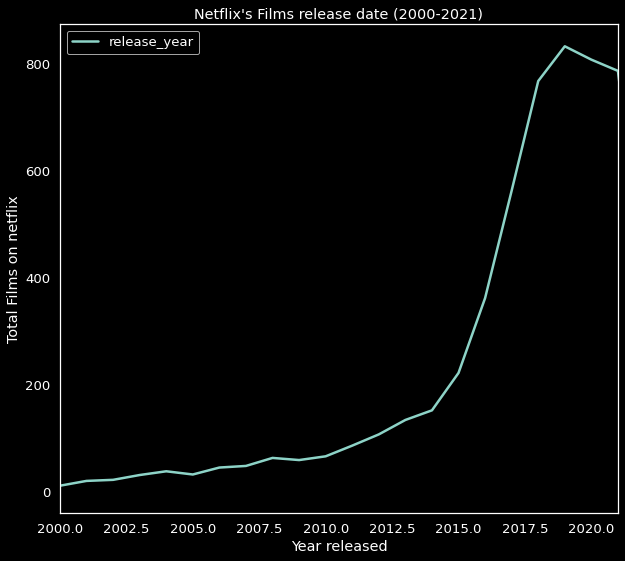

In [ ]:
plt.figure(figsize=(10,9))
sns.lineplot(data= release_count)
plt.title("Netflix's Films release date (2000-2021)")
plt.xlim(2000,2021)
plt.xlabel("Year released")
plt.ylabel("Total Films on netflix")
plt.show()

###**6. What is the correlation between column in the Dataset?**

In [ ]:
types=df.groupby("type").size()
types

type
MOVIE    3735
SHOW     2097
dtype: int64

In [ ]:
shows= df[df.type=="SHOW"]
movies= df[df.type=="MOVIE"]

In [ ]:
shows.shape

(2097, 14)

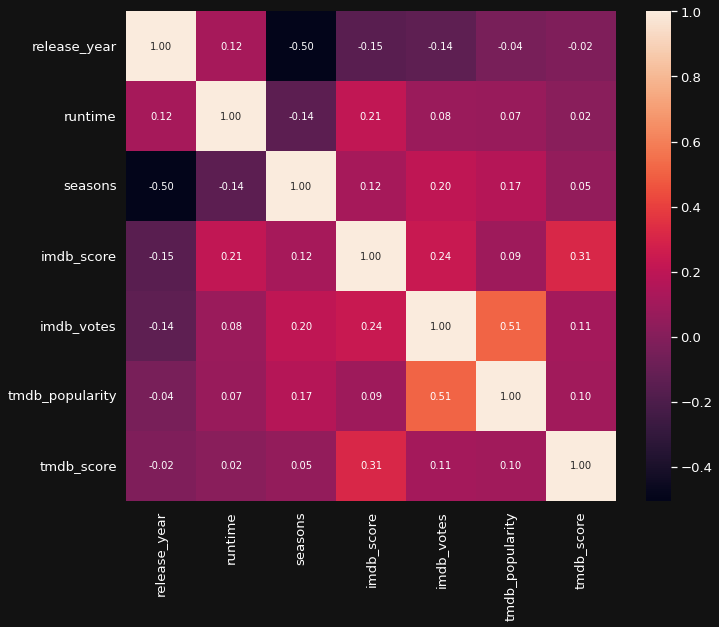

In [ ]:
sns.set_style("dark", {"axes.facecolor": "#121212", "figure.facecolor": "#121212", "xtick.color": "white", "ytick.color": "white"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
corrmat_shows = shows.corr()

f, ax = plt.subplots(figsize=(11, 9))
hm_shows = sns.heatmap(corrmat_shows, cbar=True, annot=True, square=True, 
                       fmt=".2f", annot_kws={"size": 10}, yticklabels=corrmat_shows.index, 
                       xticklabels=corrmat_shows.index)
plt.show()


Conclusion:
1. The 2 different scores: imdb and tmdb only have a weak correlation, where if it's  a good show they should have similar correlation. Meaning the platform score is independent.
2. Number of seasons have a small correlation with tmdb_popularity. Meaning the more popular the show, it's more likely to get sequel.
3. tmdb_popularity and imdb_votes is correlated. 

In [ ]:
movies.shape

(3735, 14)

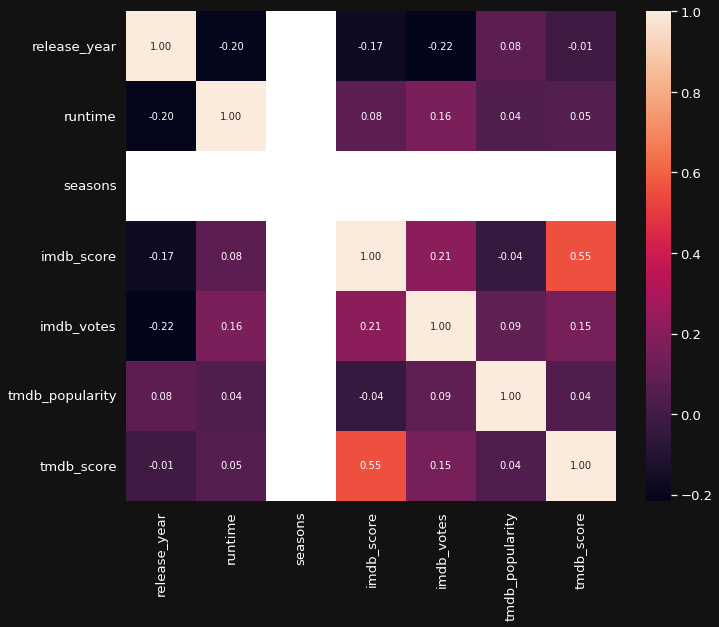

In [ ]:
# Set the style to dark and change the font settings
sns.set_style("dark", {"axes.facecolor": "white", "figure.facecolor": "#121212", "xtick.color": "white", "ytick.color": "white"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

# Create the correlation matrix
corrmat_movies = movies.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(11, 9))
hm_movies = sns.heatmap(corrmat_movies, cbar=True, annot=True, square=True, 
                       fmt=".2f", annot_kws={"size": 10}, yticklabels=corrmat_movies.index, 
                       xticklabels=corrmat_movies.index)

# Show the plot
plt.show()

Conclusion:
1. Just like the shows both of the movies scores had a correlation with each other, the only difference are it had a little more correlation
2. In movies there's no seasonal data, so it could'nt be calculated.

###**7. What is the distribution af age certification based on type of films?**

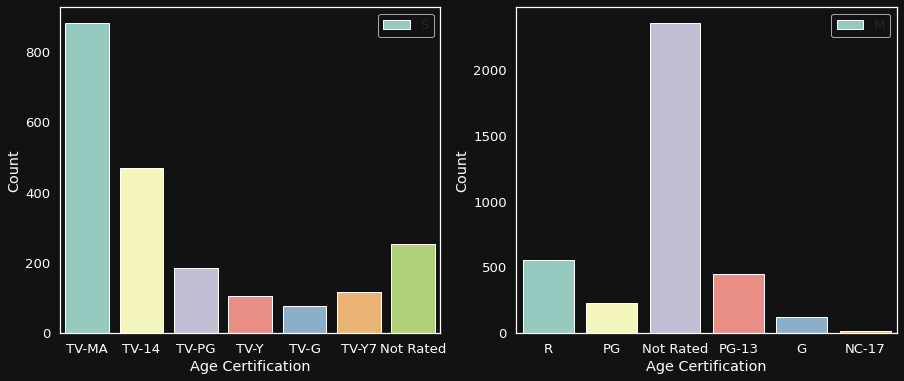

In [ ]:
sns.set_style("dark", {"axes.facecolor": "#121212", "figure.facecolor": "#121212", "xtick.color": "white", "ytick.color": "white"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
fig,ax= plt.subplots(1,2) #1 row 2 columns
fig.set_size_inches(15,6)
sns.countplot(x="age_certification",data=shows,ax=ax[0])
sns.countplot(x="age_certification",data=movies,ax=ax[1])
ax[0].set_ylabel("Count", color="white")
ax[1].set_ylabel("Count", color="white")
ax[0].set_xlabel("Age Certification", color="white")
ax[1].set_xlabel("Age Certification", color="white")
ax[0].legend("Shows")
ax[1].legend("Movies")
fig.show()

In [ ]:
shows_runtime_max= max(shows.runtime)
shows_runtime_min= min(shows[shows.runtime >0].runtime) #ignore runtime if 0

movies_runtime_max= max(movies.runtime)
movies_runtime_min= min(movies[movies.runtime >0].runtime)

shows_avg= statistics.mean(shows.runtime)
movies_avg= statistics.mean(movies.runtime)

In [ ]:
print(f"The average duration for a show on netflix is {int(shows_avg)} minutes, \nThe maximum duration is {shows_runtime_max} minutes and, \nThe minimum duration is {shows_runtime_min} minutes.")
print("\n")
print(f"The average duration for a movie on netflix is {int(movies_avg)} minutes, \nThe maximum duration is {movies_runtime_max} minutes and, \nThe minimum duration is {movies_runtime_min} minutes.")

The average duration for a show on netflix is 39 minutes, 
The maximum duration is 190 minutes and, 
The minimum duration is 2 minutes.


The average duration for a movie on netflix is 98 minutes, 
The maximum duration is 240 minutes and, 
The minimum duration is 2 minutes.


In [ ]:
df["genres"] = df["genres"].apply(lambda x: re.findall("\w+", x))

genres = list(df["genres"].values)
genres = list(set([item for sublist in genres for item in sublist]))

for i, genre in enumerate(genres):
    df[genre] = df.genres.apply(lambda x: 1 if genre in x else 0).astype(int)

print("Number of Genres: ", len(genres))
print("Genres:", genres)

Number of Genres:  19
Genres: ['reality', 'documentation', 'romance', 'family', 'animation', 'war', 'european', 'sport', 'comedy', 'crime', 'drama', 'history', 'music', 'western', 'horror', 'scifi', 'action', 'fantasy', 'thriller']


###**8. Top 5 Movies by IMDB Votes and Score**

In [ ]:
df.query("type == 'MOVIE'")[['release_year',
                             'title',
                             'type',
                             'runtime',
                             'imdb_score',
                             'imdb_votes',
                             'genres']]\
    .sort_values(by=["imdb_votes", "imdb_score"],
                 ascending=False)\
    .head(5)\
    .reset_index(drop=True)

,release_year,title,type,runtime,imdb_score,imdb_votes,genres
0,2010,Inception,MOVIE,148,8.8,2294231.0,"[action, scifi, music, thriller]"
1,1994,Forrest Gump,MOVIE,142,8.8,2021343.0,"[drama, romance]"
2,2012,The Dark Knight Rises,MOVIE,165,8.4,1669067.0,"[thriller, action, drama, crime]"
3,1995,Se7en,MOVIE,127,8.6,1606270.0,"[crime, thriller, drama]"
4,2012,Django Unchained,MOVIE,165,8.4,1472668.0,"[western, drama]"


###**9. Top 5 Shows by IMDB Votes and Score**

In [ ]:
df.query("type == 'SHOW'")[['release_year',
                            'title',
                            'type',
                            'runtime',
                            'imdb_score',
                            'imdb_votes',
                            'genres',
                            ]]\
    .sort_values(by=["imdb_votes", "imdb_score"],
                 ascending=False)\
    .head(5)\
    .reset_index(drop=True)

,release_year,title,type,runtime,imdb_score,imdb_votes,genres
0,2008,Breaking Bad,SHOW,48,9.5,1775990.0,"[drama, crime, thriller]"
1,2016,Stranger Things,SHOW,61,8.7,1101055.0,"[scifi, thriller, drama, fantasy, horror]"
2,2010,The Walking Dead,SHOW,46,8.2,956604.0,"[action, drama, scifi, horror, thriller]"
3,2011,Black Mirror,SHOW,59,8.8,526383.0,"[drama, scifi, thriller, european]"
4,2013,Peaky Blinders,SHOW,58,8.8,511668.0,"[crime, drama, european]"


###**10. Best Films for every Genre by IMDB Votes and Score**

In [ ]:
best_by_genre = pd.DataFrame(columns=df.columns.tolist() + ["selected_genre"])

for i, genre in enumerate(sorted(genres)):
    best_genre_data = df.query(f"{genre} == 1").sort_values(by=["imdb_votes", "imdb_score"], ascending=False).reset_index().head(1)
    best_genre_data["selected_genre"] = genre
    
    best_by_genre = pd.concat([best_by_genre, best_genre_data], ignore_index=True).reset_index(drop=True)

best_by_genre[['release_year', 'title', 'selected_genre', 'imdb_score']]

,release_year,title,selected_genre,imdb_score
0,2010,Inception,action,8.8
1,2014,The Flash,animation,7.6
2,2000,Snatch,comedy,8.3
3,2008,Breaking Bad,crime,9.5
4,2002,Road to Perdition,documentation,7.7
5,1994,Forrest Gump,drama,8.8
6,1994,Léon: The Professional,european,8.5
7,2014,The Flash,family,7.6
8,2016,Stranger Things,fantasy,8.7
9,2017,Dunkirk,history,7.8


##Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5832 entries, 0 to 5849
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5832 non-null   object 
 1   title                 5832 non-null   object 
 2   type                  5832 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5832 non-null   int64  
 5   age_certification     5832 non-null   object 
 6   runtime               5832 non-null   int64  
 7   genres                5832 non-null   object 
 8   production_countries  5832 non-null   object 
 9   seasons               5832 non-null   float64
 10  imdb_score            5832 non-null   float64
 11  imdb_votes            5832 non-null   float64
 12  tmdb_popularity       5832 non-null   float64
 13  tmdb_score            5832 non-null   float64
 14  reality               5832 non-null   int64  
 15  documentation        

In [ ]:
df['title'].nunique()

5781

Cleaning the inconsistencies in the title and making new column

In [ ]:
import re

def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

In [ ]:
df["clean_title"] = df["title"].apply(clean_title)

In [ ]:
data = df

In [ ]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,reality,documentation,romance,family,animation,war,european,sport,comedy,crime,drama,history,music,western,horror,scifi,action,fantasy,thriller,clean_title
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,[documentation],['US'],1.0,6.510861,23439.382474,0.600,6.829175,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Five Came Back The Reference Films
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"[drama, crime]",['US'],0.0,8.200000,808582.000000,40.965,8.179000,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,Taxi Driver
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"[drama, action, thriller, european]",['US'],0.0,7.700000,107673.000000,10.010,7.300000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,Deliverance
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"[fantasy, action, comedy]",['GB'],0.0,8.200000,534486.000000,15.461,7.811000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,Monty Python and the Holy Grail
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,Not Rated,150,"[war, action]","['GB', 'US']",0.0,7.700000,72662.000000,20.398,7.600000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,The Dirty Dozen


##Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(df["clean_title"])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def search(title):
    title = clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = df.iloc[indices].iloc[::-1]
    
    return results

In [ ]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    value='Stranger Things',
    description='Movie Title:',
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(search(title))

movie_input.observe(on_type, names='value')


display(movie_input, movie_list)

Text(value='Stranger Things', description='Movie Title:')

Output()

In [ ]:
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,reality,documentation,romance,family,animation,war,european,sport,comedy,crime,drama,history,music,western,horror,scifi,action,fantasy,thriller,clean_title
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,[documentation],['US'],1.0,6.510861,23439.382474,0.600,6.829175,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Five Came Back The Reference Films
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"[drama, crime]",['US'],0.0,8.200000,808582.000000,40.965,8.179000,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,Taxi Driver
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"[drama, action, thriller, european]",['US'],0.0,7.700000,107673.000000,10.010,7.300000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,Deliverance
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"[fantasy, action, comedy]",['GB'],0.0,8.200000,534486.000000,15.461,7.811000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,Monty Python and the Holy Grail
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,Not Rated,150,"[war, action]","['GB', 'US']",0.0,7.700000,72662.000000,20.398,7.600000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,The Dirty Dozen


In [ ]:
data.shape

(5832, 34)

###Content Based Recommendation System

In [ ]:
df["director"] = pd.merge(
    df, credits_df[credits_df["role"] == "DIRECTOR"], on="id", how="left"
)["name"].replace(np.nan, None)

df["actors"] = pd.merge(
    df,
    pd.merge(df, credits_df[credits_df["role"] == "ACTOR"], on="id", how="left")
    .groupby("id")["name"]
    .apply(lambda x: x.tolist() if x is not np.nan else None),
    on="id",
    how="left",
)["name"].apply(lambda x: ["" if i is np.nan else str(i) for i in x])

df["actors"] = df["actors"].replace(np.nan, "")

Adding the directors and actors name from the credits dataset.

In [ ]:
df["overview"] = (
    (
        df["clean_title"].astype(str)
        + " "
        + df["description"].astype(str)
        + " "
        + df["genres"].apply(lambda x: " ".join(x))
        + " "
        + df["director"].astype(str)
        + " "
        + df["actors"].apply(lambda x: "" if x is [] else " ".join(x))
        + " "
        + df["production_countries"].astype(str)
    )
    .str.lower()
    .str.replace("\n", " ")
    .str.replace("—", "")
    .str.translate(str.maketrans("", "", string.punctuation))
)

Creating a table to hold movie or show informations which include title, director, actors, genres, description, production country 

In [ ]:
count = CountVectorizer(stop_words="english", ngram_range=(1, 5))
count_matrix = count.fit_transform(df["overview"])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

indices = pd.Series(df.index, index=df["clean_title"])

Count Vectorizer helps in creating a sparse matrix of token counts in the bag of words for every title

In [ ]:
def get_recommendations(title, cosine_sim, top_k=5):

    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:20]
    movie_indices = [i[0] for i in sim_scores if i[0] != idx]

    return (
        df.iloc[movie_indices]
        .sort_values(["imdb_votes", "imdb_score"], ascending=False)[
            ["clean_title", "description", "genres", "imdb_score"]
        ]
        .reset_index(drop=True)
        .head(top_k)
    )

Creating a recommendation function to get the top 10 movies or shows based on the movie one has watched

In [ ]:
get_recommendations("Breaking Bad", cosine_sim=cosine_sim, top_k=10)

,clean_title,description,genres,imdb_score
0,Mindhunter,An agent in the FBI's Elite Serial Crime Unit develops profiling techniques as he pursues notorious serial killers and rapists.,"[drama, crime, thriller]",8.600000
1,Polar,"When a retiring assassin realizes that he is the target of a hit, he winds up back in the game going head to head with a gang of younger, ruthless killers.","[action, drama, crime, thriller, european]",6.300000
2,Drishyam,"A simple, street-smart man tries to protect his family from a tough cop looking for his missing son.","[thriller, crime, drama]",8.200000
3,Top Boy,"A thrilling and raw crime drama following a gang of drug dealers in Hackney, London - an honest and gripping rendition of inner-city drug and gang culture.","[drama, crime, thriller, european]",8.400000
4,Extracurricular,"Determined to escape a dead-end life, a gifted high school student turns to a world of serious crime to ensure he can pay for college.","[drama, crime]",6.510861
5,Pieces of Her,An act of violence rocks a sleepy Georgia town as well as the bond between a mother and her daughter.,"[drama, crime, thriller]",6.300000
6,The Last Days of American Crime,"In the not-too-distant future, as a final response to crime and terrorism, the U.S. government plans to broadcast a signal that will make it impossible for anyone to knowingly break the law.","[action, crime, thriller, scifi, drama]",3.700000
7,Baazaar,"After moving to Mumbai, an ambitious young man becomes the stock trader for a notorious businessman.","[crime, drama, thriller]",6.500000
8,Dare Me,The lives of several cheerleaders are changed forever when a shocking crime rocks their quiet suburban world.,"[thriller, crime, drama, reality]",6.600000
9,Spotless,"In London, the life of Jean, a troubled crime scene cleaner, is turned upside down when his outlaw brother Martin crash lands into his world, entangling them in the deadly dynamics of organized crime.","[crime, comedy, drama, european]",7.700000


In [ ]:
get_recommendations("GoodFellas", cosine_sim=cosine_sim, top_k=10)

,clean_title,description,genres,imdb_score
0,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's crimes to protect the late attorney's reputation and is subsequently hunted by the Gotham City Police Department. Eight years later, Batman encounters the mysterious Selina Kyle and the villainous Bane, a new terrorist leader who overwhelms Gotham's finest. The Dark Knight resurfaces to protect a city that has branded him an enemy.","[thriller, action, drama, crime]",8.4
1,The Departed,"To take down South Boston's Irish Mafia, the police send in one of their own to infiltrate the underworld, not realizing the syndicate has done likewise. While an undercover cop curries favor with the mob kingpin, a career criminal rises through the police ranks. But both sides soon discover there's a mole among them.","[drama, thriller, crime, action]",8.5
2,Catch Me If You Can,"A true story about Frank Abagnale Jr. who, before his 19th birthday, successfully conned millions of dollars worth of checks as a Pan Am pilot, doctor, and legal prosecutor. An FBI agent makes it his mission to put him behind bars. But Frank not only eludes capture, he revels in the pursuit.","[drama, crime]",8.1
3,Taxi Driver,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,"[drama, crime]",8.2
4,The Irishman,"Pennsylvania, 1956. Frank Sheeran, a war veteran of Irish origin who works as a truck driver, accidentally meets mobster Russell Bufalino. Once Frank becomes his trusted man, Bufalino sends him to Chicago with the task of helping Jimmy Hoffa, a powerful union leader related to organized crime, with whom Frank will maintain a close friendship for nearly twenty years.","[crime, drama, history, thriller]",7.8
5,Once Upon a Time in America,"A former Prohibition-era Jewish gangster returns to the Lower East Side of Manhattan over thirty years later, where he once again must confront the ghosts and regrets of his old life.","[crime, drama, european]",8.3
6,Les Misrables,"An adaptation of the successful stage musical based on Victor Hugo's classic novel set in 19th-century France, in which a paroled prisoner named Jean Valjean seeks redemption.","[drama, history, romance, war]",7.5
7,Donnie Brasco,An FBI undercover agent infilitrates the mob and finds himself identifying more with the mafia life at the expense of his regular one.,"[drama, thriller, crime]",7.7
8,Michael Clayton,A law firm brings in its 'fixer' to remedy the situation after a lawyer has a breakdown while representing a chemical company that he knows is guilty in a multi-billion dollar class action suit.,"[thriller, drama, crime]",7.2
9,The Last Dance,"A 10-part documentary chronicling the untold story of Michael Jordan and the Chicago Bulls dynasty with rare, never-before-seen footage and sound from the 1997-98 championship season – plus over 100 interviews with famous figures and basketball’s biggest names.","[documentation, history, sport]",9.1


In [ ]:
get_recommendations("Altered Carbon", cosine_sim=cosine_sim, top_k=5)

,clean_title,description,genres,imdb_score
0,Dunkirk,"The story of the miraculous evacuation of Allied soldiers from Belgium, Britain, Canada and France, who were cut off and surrounded by the German army from the beaches and harbour of Dunkirk between May 26th and June 4th 1940 during World War II.","[drama, war, action, thriller, history, european]",7.8
1,Outlaw King,"Forced into exile by the English after being crowned King of Scotland, legendary warrior Robert the Bruce fights to reclaim the throne.","[action, drama, history, war]",6.9
2,Mudbound,"In the post–World War II South, two families are pitted against a barbaric social hierarchy and an unrelenting landscape as they simultaneously fight the battle at home and the battle abroad.","[drama, war]",7.4
3,Official Secrets,The true story of British intelligence whistleblower Katharine Gun who—prior to the 2003 Iraq invasion—leaked a top-secret NSA memo exposing a joint US-UK illegal spying operation against members of the UN Security Council. The memo proposed blackmailing member states into voting for war.,"[drama, thriller, history, crime, war, romance]",7.3
4,War Machine,A rock star general bent on winning the “impossible” war in Afghanistan takes us inside the complex machinery of modern war. Inspired by the true story of General Stanley McChrystal.,"[drama, comedy, war]",6.0
